In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import datetime
from pandas.plotting import autocorrelation_plot

In [4]:
os.chdir("D:\kuliah\LOMBA\GEMASTIK 12\EDM22\Jupyter-notebook\csvcluster")
extension ='csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames])
combined_csv.head()

,Tahun,count,cluster
0,201401,1,0
1,201402,115,0
2,201403,185,0
3,201406,10,0
4,201407,6,0


In [6]:
combined_csv.to_csv("combinedtoarima.csv")

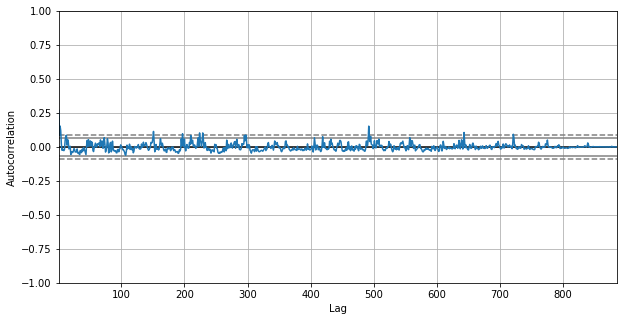

In [20]:
series = pd.read_csv("combinedtoarima.csv", usecols=['Tahun','count'], header=0, parse_dates=[0],index_col=0, squeeze=True)
plt.figure(figsize=(10,5))
autocorrelation_plot(series)
plt.show()

C:\Users\Ahmad Shohibus S\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Ahmad Shohibus S\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Ahmad Shohibus S\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


=====model=====
                             ARIMA Model Results                              
Dep. Variable:                D.count   No. Observations:                  884
Model:                ARIMA(15, 1, 5)   Log Likelihood               -5620.222
Method:                       css-mle   S.D. of innovations            138.792
Date:                Thu, 26 Sep 2019   AIC                          11284.444
Time:                        20:57:25   BIC                          11389.702
Sample:                             1   HQIC                         11324.688
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0233      0.024     -0.977      0.329      -0.070       0.023
ar.L1.D.count      0.1619      0.029      5.531      0.000       0.105       0.219
ar.L2.D.count      0

C:\Users\Ahmad Shohibus S\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\Users\Ahmad Shohibus S\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Ahmad Shohibus S\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Ahmad Shohibus S\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


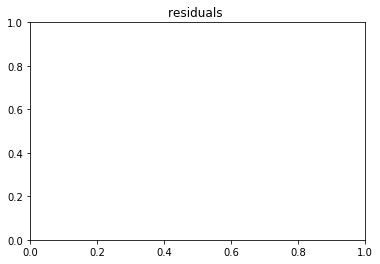

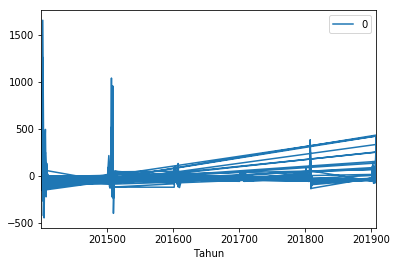

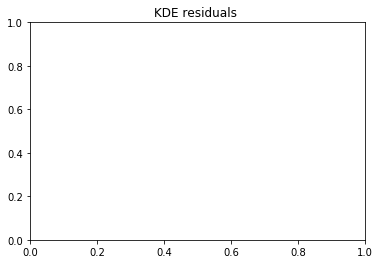

In [21]:
model = ARIMA(series,order = (15,1,5))
model_fit = model.fit(disp=0)
print("=====model=====")
print(model_fit.summary())
residuals = pd.DataFrame(model_fit.resid)
plt.title("residuals ")
residuals.plot()
plt.show()
plt.title("KDE residuals ")
plt.show()
print("============================")